## Now we can do the same process for any conference, any event in the NCAA.

## Let's do it for D1 Pole Vault Nationals. Just copy paste and edit the tags from TFRRS.

In [16]:
import requests
import pandas as pd
from bs4 import BeautifulSoup


links_lists = {
    2024 : "https://tf.tfrrs.org/lists/4515/2024_NCAA_Division_I_Rankings_FINAL?gender=m#event24",
    2023 : "https://tf.tfrrs.org/lists/4044/2023_NCAA_Division_I_All_Schools_Rankings?gender=m",
    2022 : "https://tf.tfrrs.org/lists/3711/2022_NCAA_Division_I_Outdoor_Qualifying_FINAL?gender=m",
    2021 : "https://tf.tfrrs.org/lists/3191/2021_NCAA_Division_I_Outdoor_Qualifying_FINAL?gender=m",
    2019 : "https://tf.tfrrs.org/lists/2568/2019_NCAA_Division_I_Outdoor_Qualifying_FINAL?gender=m",
    2018 : "https://tf.tfrrs.org/lists/2279/2018_NCAA_Division_I_Outdoor_Qualifying_FINAL?gender=m",
    2017 : "https://tf.tfrrs.org/lists/1912/2017_NCAA_Div_I_Outdoor_Qualifying_FINAL?gender=m",
    2016 : "https://tf.tfrrs.org/lists/1688/2016_NCAA_Division_I_Outdoor_Qualifying_FINAL?gender=m",
    2015 : "https://tf.tfrrs.org/lists/1439/2015_NCAA_Division_I_Outdoor_Qualifying_FINAL?gender=m",
    2014 : "https://tf.tfrrs.org/lists/1228/2014_NCAA_Division_I_Outdoor_Qualifying_FINAL?gender=m",
    2013 : "https://tf.tfrrs.org/lists/1029/2013_NCAA_Division_I_Outdoor_Qualifying_FINAL?gender=m",
    2012 : "https://tf.tfrrs.org/lists/840/2012_NCAA_Div_I_Outdoor_Qualifiers_Final?gender=m",
    2011 : "https://tf.tfrrs.org/lists/673/2011_NCAA_Division_I_Outdoor_POP_List_FINAL?gender=m",
    2010 : "https://tf.tfrrs.org/lists/528/2010_NCAA_Division_I_Outdoor_POP_List_FINAL?gender=m"
}

links_champs = {
    2024 : "https://www.tfrrs.org/results/87017/5286207/NCAA_Division_I_Outdoor_Track__Field_Championships/Mens-Pole-Vault",
    2023 : "https://www.tfrrs.org/results/81300/4938097/NCAA_Division_I_Outdoor_Track__Field_Championships/Mens-Pole-Vault",
    2022 : "https://www.tfrrs.org/results/75224/4567505/NCAA_Division_I_Outdoor_Track__Field_Championships/Mens-Pole-Vault",
    2021 : "https://www.tfrrs.org/results/70445/4276063/NCAA_Division_I_Track__Field_Championships/Mens-Pole-Vault",
    2019 : "https://www.tfrrs.org/results/62668/3850648/NCAA_Division_I_Outdoor_Track__Field_Championships/Mens-Pole-Vault",
    2018 : "https://www.tfrrs.org/results/57114/3516379/NCAA_Division_I_Outdoor_Championships/Mens-Pole-Vault",
    2017 : "https://www.tfrrs.org/results/51935/3199104/NCAA_Division_I_Outdoor_Track__Field_Championships/Mens-Pole-Vault",
    2016 : "https://www.tfrrs.org/results/46699/2884169/NCAA_Division_I_Track__Field_Championships/Mens-Pole-Vault",
    2015 : "https://www.tfrrs.org/results/41405/2568010/NCAA_Division_I_Outdoor_Track__Field_Championships/Mens-Pole-Vault",
    2014 : "https://www.tfrrs.org/results/36208/2250535/NCAA_Division_I_Outdoor_Track__Field_Championships/Mens-Pole-Vault",
    2013 : "https://www.tfrrs.org/results/31188/1946766/NCAA_Division_I_National_Championships/Mens-Pole-Vault",
    2012 : "https://www.tfrrs.org/results/26566/1670211/NCAA_Division_I_Championships/Mens-Pole-Vault",
    2011 : "https://www.tfrrs.org/results/22067/1392923/NCAA_Division_I_Championships/Mens-Pole-Vault",
    2010 : "https://tf.tfrrs.org/results/17769/1139581/2010_NCAA_Division_I_Outdoor_Track__Field_Championships/Mens-Pole-Vault"
}

#row gender_m standard_event_hnd_24

# URL for the 2024 Big Ten performance list (example URL, replace with the actual one when available)
#url = "https://www.tfrrs.org/lists/4759/Big_Ten_Outdoor_Performance_List"

def extract_table_lists(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        # Use CSS selectors to find the container with both classes
        container = soup.select_one('.gender_m.standard_event_hnd_24')
        if container:
            # Find the first table within this container
            table = container.find('table')
            if table:
                # Convert the HTML table into a pandas DataFrame
                df = pd.read_html(str(table))[0]
                return df
    else:
        print(f"Failed to fetch data from {url}")
    return None



dataframes_lists = {}

for year, url in links_lists.items():
    df = extract_table_lists(url)
    if df is not None:
        dataframes_lists[year] = df
        print(f"Extracted data for {year}")
    else:
        print(f"Failed to extract data for {year}")




def extract_table_champs(url):
    # Send a GET request to the URL
    response = requests.get(url)
    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.text, 'html.parser')
        # Find the first table in the HTML
        table = soup.find('table')
        if table:
            # Extract table headers
            headers = [header.text.strip() for header in table.find_all('th')]
            if not headers:
                print("No headers found in the table.")
                return None

            # Extract table rows
            rows = []
            for row in table.find_all('tr'):
                cols = [ele.text.strip() for ele in row.find_all('td')]
                if cols:  # Ensure the row contains data cells
                    rows.append(cols)

            if not rows:
                print("No data rows found in the table.")
                return None

            # Create a DataFrame from the rows, skipping every other row
            if(url =="https://www.tfrrs.org/results/26566/1670211/NCAA_Division_I_Championships/Mens-Pole-Vault" ):
                df = pd.DataFrame(rows, columns=headers)
            else :
                df = pd.DataFrame(rows[::2], columns=headers)
            return df
        else:
            print("No table found in the HTML content.")
            return None
    else:
        print(f"Failed to fetch data from {url}. HTTP status code: {response.status_code}")
        return None

dataframes_champs = {}

for year, url in links_champs.items():
    df = extract_table_champs(url)
    if df is not None:
        dataframes_champs[year] = df
        print(f"Extracted data for {year}")
    else:
        print(f"Failed to extract data for {year}")




# Define the columns to keep
columns_to_keep = ['NAME', 'YEAR', 'TEAM', 'CONV']

# Iterate over the dataframes_champs dictionary
for key, df in dataframes_champs.items():
    # Select only the columns that exist in both the DataFrame and the columns_to_keep list
    columns_to_select = [col for col in columns_to_keep if col in df.columns]
    # Update the DataFrame in the dictionary to only include the selected columns
    dataframes_champs[key] = df[columns_to_select]


# Define the columns to keep
columns_to_keep = ['Athlete', 'Year', 'Team', 'Mark']

# Iterate over the dataframes_lists dictionary to only keep specified columns
for key, df in dataframes_lists.items():
    df = df.rename(columns={'Conv': 'Mark'})
    # Select only the columns that exist in both the DataFrame and the columns_to_keep list
    columns_to_select = [col for col in columns_to_keep if col in df.columns]
    # Update the DataFrame in the dictionary to only include the selected columns
    dataframes_lists[key] = df[columns_to_select]
    df = df.drop(df.columns[-2],axis=1)
    df = df.rename(columns={'Mark.1' : 'Mark'})


print(dataframes_lists[2024])
print(dataframes_champs[2024])


Extracted data for 2024
Extracted data for 2023
Extracted data for 2022
Extracted data for 2021
Extracted data for 2019
Extracted data for 2018
Extracted data for 2017
Extracted data for 2016
Extracted data for 2015
Extracted data for 2014
Extracted data for 2013
Extracted data for 2012
Extracted data for 2011
Extracted data for 2010
Extracted data for 2024
Extracted data for 2023
Extracted data for 2022
Extracted data for 2021
Extracted data for 2019
Extracted data for 2018
Extracted data for 2017
Extracted data for 2016
Extracted data for 2015
Extracted data for 2014
Extracted data for 2013
Extracted data for 2012
Extracted data for 2011
Extracted data for 2010
                   Athlete  Year                Team   Mark        Mark
0        Garretson, Hunter  SR-4               Akron  5.83m    19' 1.5"
1          McClure, Conner  SO-2       Virginia Tech  5.75m  18' 10.25"
2           Daniel, Keaton  SR-4            Kentucky  5.67m   18' 7.25"
3          Rademeyer, Kyle  SR-4       S

In [17]:
# Iterate over the dataframes_lists dictionary
for key, df in dataframes_lists.items():
    # Drop the last column
    dataframes_lists[key] = df.iloc[:, :-1]
print(dataframes_lists[2024])

                   Athlete  Year                Team   Mark
0        Garretson, Hunter  SR-4               Akron  5.83m
1          McClure, Conner  SO-2       Virginia Tech  5.75m
2           Daniel, Keaton  SR-4            Kentucky  5.67m
3          Rademeyer, Kyle  SR-4       South Alabama  5.65m
4        Guttormsen, Simen  SR-4                Duke  5.65m
5         Sampy, Christyan  SR-4             Houston  5.65m
6            Hammer, Logan  SO-2          Utah State  5.62m
7            Rhoads, James  JR-3                Penn  5.62m
8          Johnston , Cody  FR-1            Illinois  5.60m
9             Hamm, Maddox  FR-1       Virginia Tech  5.55m
10            Toney, Scott  SR-4                Penn  5.54m
11          Magula, Skyler  SR-4          California  5.52m
12          Simms, Clayton  JR-3              Kansas  5.52m
13           Urlacher, Jak  JR-3           Minnesota  5.51m
14         Staggs, William  JR-3       Indiana State  5.50m
15             Babin, Kobe  SR-4       S

In [21]:
import re

def feet_inches_to_meters(mark):
  if isinstance(mark, str) and "'" in mark and '"' in mark:
    feet, inches = re.findall(r'(\d+)\' (\d+\.?\d*)"', mark)[0]
    meters = float(feet) * 0.3048 + float(inches) * 0.0254
    return meters
  else:
    return mark

# Iterate through dataframes and convert marks
for year, df in dataframes_champs.items():
  df['CONV'] = df['CONV'].apply(feet_inches_to_meters)

print(dataframes_champs[2024])

                     NAME  YEAR              TEAM     CONV
0           Keaton Daniel  SR-4          Kentucky  5.67055
1           Clayton Simms  JR-3            Kansas  5.61975
2        Simen Guttormsen  SR-4              Duke  5.51815
3         Christyan Sampy  SR-4           Houston  5.51815
4          Cody  Johnston  FR-1          Illinois  5.51815
5           Skyler Magula  SR-4        California  5.51815
6            James Rhoads  JR-3              Penn  5.51815
7         Marshall Faurot  SR-4      South Dakota  5.36575
8          Kyle Rademeyer  SR-4     South Alabama  5.36575
9            Eerik Haamer  SR-4      South Dakota  5.36575
10         Conner McClure  SO-2     Virginia Tech  5.36575
11             Max Manson  SR-4        Washington  5.36575
12            Scott Toney  SR-4              Penn  5.36575
13            Randon Gray  SR-4      UT-Arlington  5.36575
14       Walter Bannerman  SO-2      George Mason  5.36575
15           Logan Hammer  SO-2        Utah State   5.21

In [23]:
def round_conv(conv):
  try:
    return round(float(conv), 2)
  except (ValueError, TypeError):
    return conv

# Iterate through dataframes and round CONV values
for year, df in dataframes_champs.items():
  if 'CONV' in df.columns:
    df['CONV'] = df['CONV'].apply(round_conv)
print(dataframes_champs[2024])

                     NAME  YEAR              TEAM  CONV
0           Keaton Daniel  SR-4          Kentucky  5.67
1           Clayton Simms  JR-3            Kansas  5.62
2        Simen Guttormsen  SR-4              Duke  5.52
3         Christyan Sampy  SR-4           Houston  5.52
4          Cody  Johnston  FR-1          Illinois  5.52
5           Skyler Magula  SR-4        California  5.52
6            James Rhoads  JR-3              Penn  5.52
7         Marshall Faurot  SR-4      South Dakota  5.37
8          Kyle Rademeyer  SR-4     South Alabama  5.37
9            Eerik Haamer  SR-4      South Dakota  5.37
10         Conner McClure  SO-2     Virginia Tech  5.37
11             Max Manson  SR-4        Washington  5.37
12            Scott Toney  SR-4              Penn  5.37
13            Randon Gray  SR-4      UT-Arlington  5.37
14       Walter Bannerman  SO-2      George Mason  5.37
15           Logan Hammer  SO-2        Utah State  5.22
16          Arnie Grunert  SO-2  Western Illinoi

In [24]:
for year, df in dataframes_lists.items():
  df['Mark'] = df['Mark'].str.replace('m', '')
print(dataframes_lists[2024])

                   Athlete  Year                Team  Mark
0        Garretson, Hunter  SR-4               Akron  5.83
1          McClure, Conner  SO-2       Virginia Tech  5.75
2           Daniel, Keaton  SR-4            Kentucky  5.67
3          Rademeyer, Kyle  SR-4       South Alabama  5.65
4        Guttormsen, Simen  SR-4                Duke  5.65
5         Sampy, Christyan  SR-4             Houston  5.65
6            Hammer, Logan  SO-2          Utah State  5.62
7            Rhoads, James  JR-3                Penn  5.62
8          Johnston , Cody  FR-1            Illinois  5.60
9             Hamm, Maddox  FR-1       Virginia Tech  5.55
10            Toney, Scott  SR-4                Penn  5.54
11          Magula, Skyler  SR-4          California  5.52
12          Simms, Clayton  JR-3              Kansas  5.52
13           Urlacher, Jak  JR-3           Minnesota  5.51
14         Staggs, William  JR-3       Indiana State  5.50
15             Babin, Kobe  SR-4       South Florida  5.

In [25]:
for year, df in dataframes_champs.items():
  df.rename(columns={'NAME': 'Athlete', 'YEAR': 'Year', 'TEAM': 'Team', 'CONV': 'Mark'}, inplace=True)

In [26]:
print(dataframes_champs[2024])

                  Athlete  Year              Team  Mark
0           Keaton Daniel  SR-4          Kentucky  5.67
1           Clayton Simms  JR-3            Kansas  5.62
2        Simen Guttormsen  SR-4              Duke  5.52
3         Christyan Sampy  SR-4           Houston  5.52
4          Cody  Johnston  FR-1          Illinois  5.52
5           Skyler Magula  SR-4        California  5.52
6            James Rhoads  JR-3              Penn  5.52
7         Marshall Faurot  SR-4      South Dakota  5.37
8          Kyle Rademeyer  SR-4     South Alabama  5.37
9            Eerik Haamer  SR-4      South Dakota  5.37
10         Conner McClure  SO-2     Virginia Tech  5.37
11             Max Manson  SR-4        Washington  5.37
12            Scott Toney  SR-4              Penn  5.37
13            Randon Gray  SR-4      UT-Arlington  5.37
14       Walter Bannerman  SO-2      George Mason  5.37
15           Logan Hammer  SO-2        Utah State  5.22
16          Arnie Grunert  SO-2  Western Illinoi

In [29]:
for year, df in dataframes_lists.items():
  df['Mark'] = pd.to_numeric(df['Mark'])

for year, df in dataframes_champs.items():
  df.replace('NH', 0, inplace=True)
  df['Mark'] = pd.to_numeric(df['Mark'])

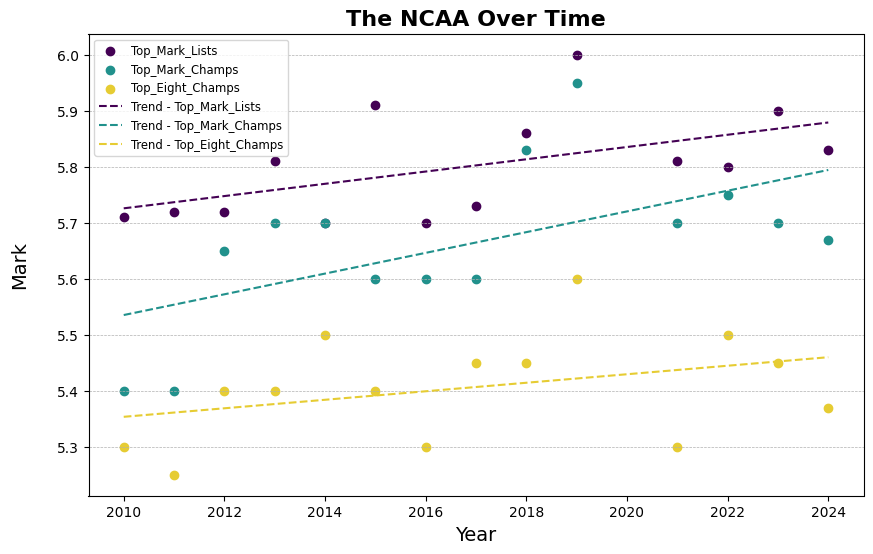

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings

years = range(2010,2025)
# Suppress FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

results_df = pd.DataFrame(columns=['Year', 'Top_Mark_Lists', 'Top_Mark_Champs', 'Top_Eight_Champs'])

for year in years:
    if year != 2020:
        # Calculate for dataframes_lists
        top_mark_lists = dataframes_lists[year]['Mark'].max()

        # Calculate for dataframes_champs
        top_mark_champs = dataframes_champs[year]['Mark'].max()

        # Calculate top_eight_champs
        top_eight_champs = dataframes_champs[year]['Mark'].sort_values(ascending=False).iloc[7] # Get 8th place finisher


        # Append to results_df
        results_df.loc[len(results_df)] = {'Year': year,
                                        'Top_Mark_Lists': top_mark_lists,
                                        'Top_Mark_Champs': top_mark_champs,
                                        'Top_Eight_Champs': top_eight_champs}

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plots with dynamic colors
colors = plt.cm.viridis(np.linspace(0, 1, len(results_df.columns)-1)) # Generate colors from viridis colormap
colors[2] = [0.9, 0.8, 0.2, 1] # Set a nice, readable yellow

columns_to_plot = ['Top_Mark_Lists', 'Top_Mark_Champs', 'Top_Eight_Champs']
for i, column in enumerate(columns_to_plot):
    plt.scatter(results_df['Year'], results_df[column], label=column, marker='o', alpha=1, color=colors[i])

# Trendlines with corresponding colors
for i, column in enumerate(columns_to_plot):
    z = np.polyfit(results_df['Year'], results_df[column], 1)
    p = np.poly1d(z)
    plt.plot(results_df['Year'], p(results_df['Year']), linestyle='dashed', label=f'Trend - {column}', color=colors[i])

plt.xlabel('Year', fontsize=14)
plt.ylabel('Mark', fontsize=14, labelpad=20)
plt.title('The NCAA Over Time',fontsize=16, fontweight='bold')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Smaller legend
plt.legend(fontsize='small', loc='upper left')

plt.show()

## Despite the trendline for the NCAA Champion moving aggressively towards 5.80, only 3 of the past 14 championship-winning heights have been greater than 5.70. That means 11/14 NCAA Champions have vaulted 5.70 or lower for their winning height.

## Also, note the year 2019; this was when Mondo Duplantis and Chris Nilsen were both in the NCAA.